# Predicting House Prices Using Random Forest

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Dataset

In [12]:
data = {
    'SquareFeet': np.random.randint(500, 5000, 100),
    'Bedrooms': np.random.randint(1, 6, 100),
    'Bathrooms': np.random.randint(1, 4, 100),
    'Age': np.random.randint(0, 50, 100),
    'Price': np.random.randint(100000, 1000000, 100)
}

df = pd.DataFrame(data)
print(df.head())

   SquareFeet  Bedrooms  Bathrooms  Age   Price
0        3812         1          2   38  119599
1        1181         5          3   11  592909
2        2021         5          1   31  748068
3        1455         1          2   23  956701
4        2458         5          2   27  164022


# Data Preprocessing

In [13]:
# Check for missing values
print(df.isnull().sum())

# Split the data into features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


SquareFeet    0
Bedrooms      0
Bathrooms     0
Age           0
Price         0
dtype: int64


In [14]:
# Initializing the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Model Evaluation

In [15]:
# Predict on the test data
y_pred = rf.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 83431184883.38101
R^2 Score: -0.292102524536892


In [20]:
#feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sorting by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

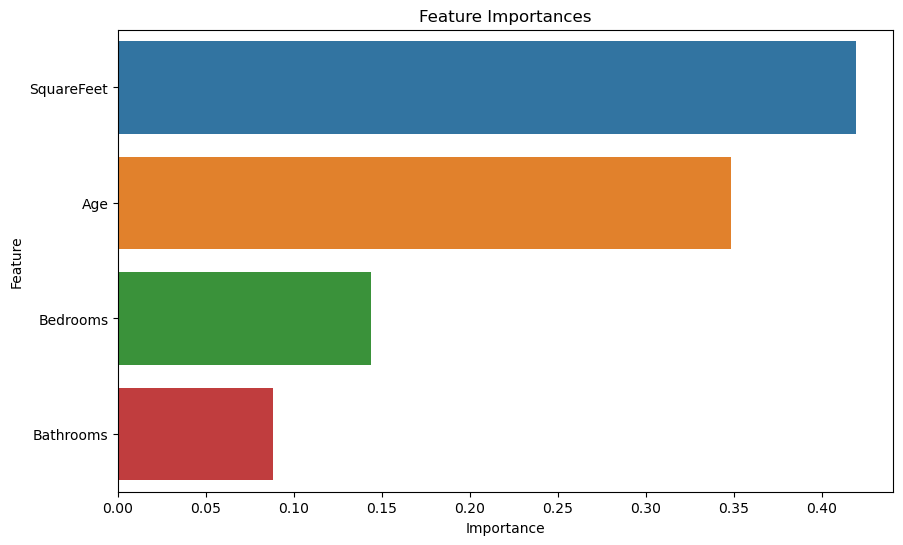

In [21]:
# Ploting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


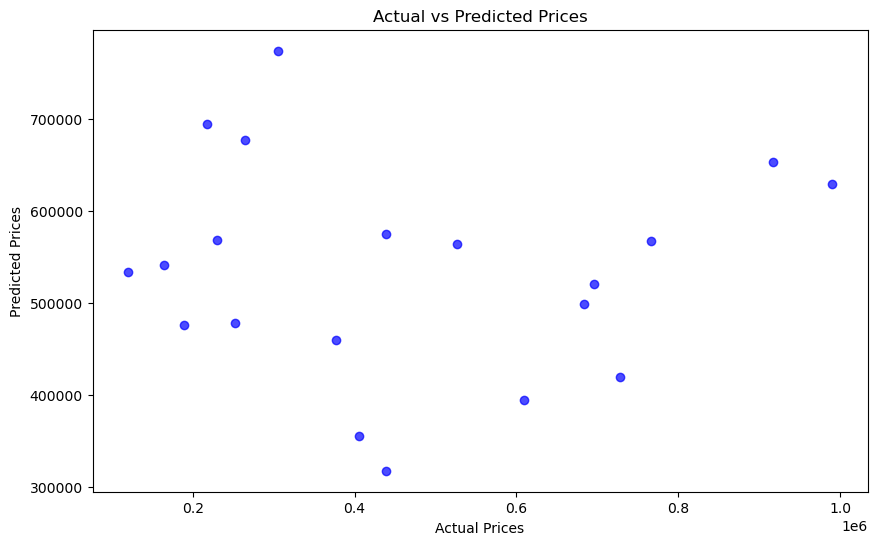

In [17]:
# Ploting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


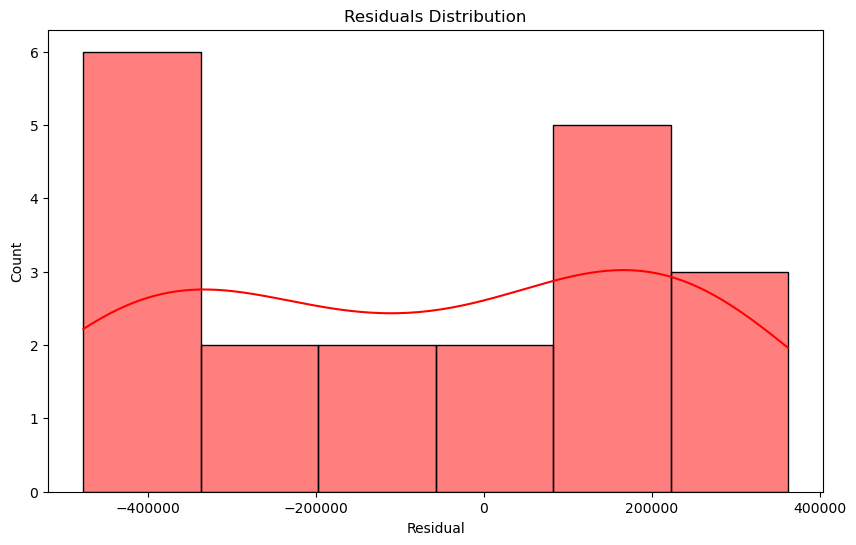

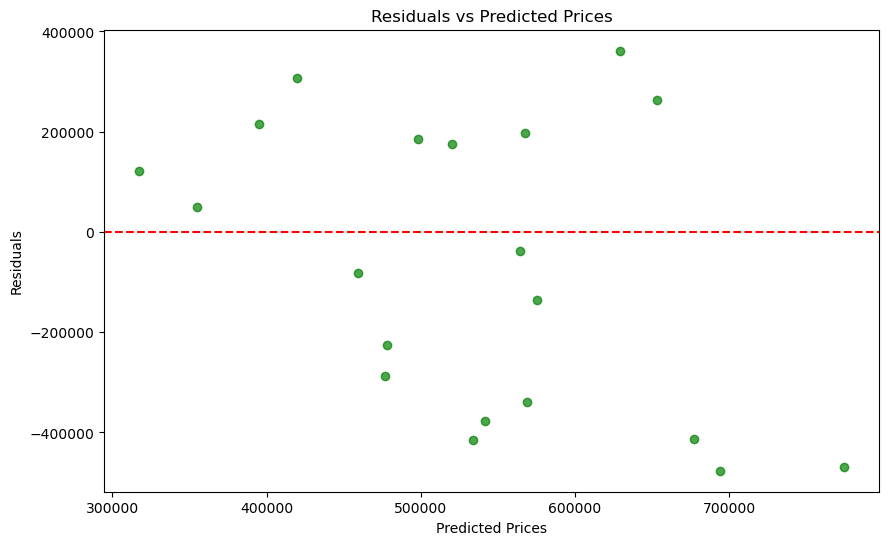

In [18]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='r')
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.show()

# Residuals vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='g')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()


        SquareFeet    Bedrooms   Bathrooms         Age          Price
count   100.000000  100.000000  100.000000  100.000000     100.000000
mean   2860.820000    3.060000    1.920000   21.770000  558736.400000
std    1351.403882    1.420058    0.837022   14.080472  267970.036626
min     531.000000    1.000000    1.000000    0.000000  104082.000000
25%    1486.500000    2.000000    1.000000    8.000000  330971.000000
50%    3046.000000    3.000000    2.000000   20.500000  525142.000000
75%    3909.250000    4.000000    3.000000   33.000000  816995.500000
max    4993.000000    5.000000    3.000000   49.000000  997937.000000


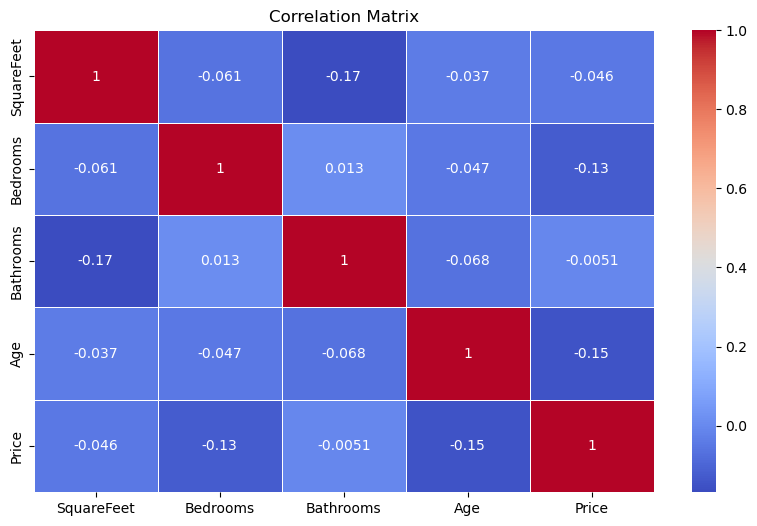

In [19]:
# Statistical summary of the dataset
print(df.describe())

# Correlation matrix
correlation_matrix = df.corr()

# Ploting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()